In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf

In [2]:
# Read CSV files from Resources folder into DataFrames
white_wine_df = pd.read_csv(Path("Resources/winequality-white.csv"))
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
red_wine_df = pd.read_csv(Path("Resources/winequality-red.csv"))
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Add "rating" column
def map_rating(quality):
    if quality <= 4:
        return "bad"
    elif quality <= 6:
        return "average"
    else:
        return "good"

red_wine_df['rating'] = red_wine_df['quality'].apply(map_rating)

red_wine_df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,average
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,average
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,average
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,average
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,average
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,good
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,average


## Red Wine Model

In [5]:
# Determine the number of unique values in each column.
red_wine_df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  60
quality                   6
rating                    3
dtype: int64

In [6]:
# Split our preprocessed data into our features and target arrays
y = red_wine_df["rating"].values
X = red_wine_df.drop(["quality", "rating"], axis='columns').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48)

In [7]:
np.unique(y_train)

array(['average', 'bad', 'good'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform target values
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [9]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Compile, Train, Evaluate Model

In [10]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
hidden_layer_1 = 20
hidden_layer_2 = 20
hidden_layer_3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_layer_1, input_dim=num_input, activation="relu")
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_layer_2, activation="relu")
)

# Third hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_layer_3, activation="relu")
)

# Output layer
nn.add(
    tf.keras.layers.Dense(units=7, activation="sigmoid")
)

# Check the structure of the model
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                240       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 7)                 77        
                                                                 
Total params: 947 (3.70 KB)
Trainable params: 947 (3.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Compile the model
nn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train_encoded, epochs=150)

Epoch 1/150


38/38 [==============================] - 2s 4ms/step - loss: 1.4442 - accuracy: 0.6539
Epoch 2/150
38/38 [==============================] - 0s 4ms/step - loss: 0.8445 - accuracy: 0.8198
Epoch 3/150
38/38 [==============================] - 0s 4ms/step - loss: 0.6380 - accuracy: 0.8198
Epoch 4/150
38/38 [==============================] - 0s 6ms/step - loss: 0.5314 - accuracy: 0.8240
Epoch 5/150
38/38 [==============================] - 0s 3ms/step - loss: 0.4746 - accuracy: 0.8299
Epoch 6/150
38/38 [==============================] - 0s 4ms/step - loss: 0.4480 - accuracy: 0.8357
Epoch 7/150
38/38 [==============================] - 0s 4ms/step - loss: 0.4313 - accuracy: 0.8357
Epoch 8/150
38/38 [==============================] - 0s 4ms/step - loss: 0.4233 - accuracy: 0.8390
Epoch 9/150
38/38 [==============================] - 0s 3ms/step - loss: 0.4167 - accuracy: 0.8424
Epoch 10/150
38/38 [==============================] - 0s 3ms/step - loss: 0.4108 - accuracy: 0.8399
Epoch 1

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test_encoded,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

13/13 - 0s - loss: 0.5384 - accuracy: 0.8525 - 279ms/epoch - 21ms/step
Loss: 0.5384286642074585, Accuracy: 0.8525000214576721


In [14]:
# Import the KNeighborsClassifier module from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier model with n_neighbors = 3 
knn = KNeighborsClassifier(n_neighbors=3)

In [15]:
# Train the model using the training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
# Create predictions using the testing data
y_pred = knn.predict(X_test_scaled)

In [17]:
# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     average       0.89      0.93      0.91       336
         bad       0.25      0.06      0.10        17
        good       0.51      0.49      0.50        47

    accuracy                           0.84       400
   macro avg       0.55      0.49      0.50       400
weighted avg       0.82      0.84      0.83       400



In [18]:
df = pd.DataFrame()
df['Actual'] = y_test
df['pred'] = y_pred
df.head()

,Actual,pred
0,average,average
1,average,average
2,average,average
3,average,average
4,average,average


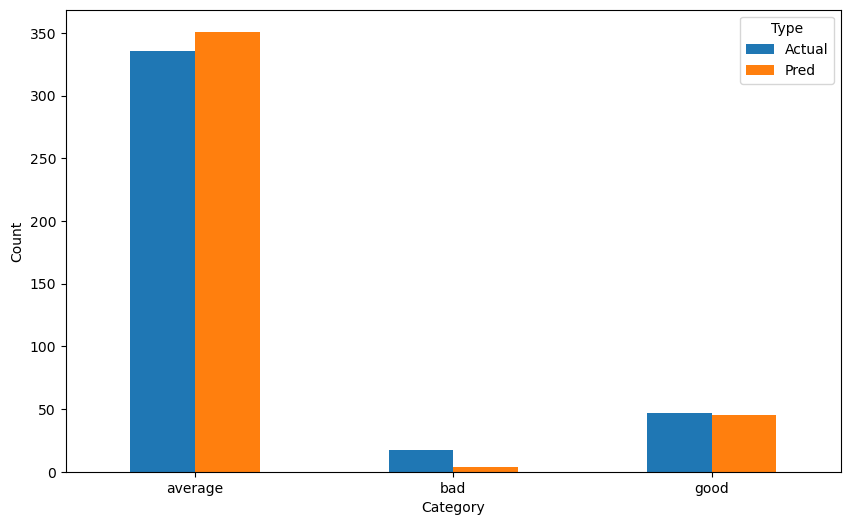

In [19]:
import matplotlib.pyplot as plt
# Calculate counts
actual_counts = df['Actual'].value_counts().sort_index()
pred_counts = df['pred'].value_counts().sort_index()

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'Actual': actual_counts, 'Pred': pred_counts})

# Plot
plot_data.plot(kind='bar', figsize=(10, 6))

# Customizing the plot
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the category names horizontal for readability
plt.legend(title='Type')

# Show plot
plt.show()

In [20]:
df.to_csv(Path("Output/red_wine_predictions.csv"), index=False)
print("DataFrame has successfully exported.")

DataFrame has successfully exported.
